In [1]:
!nvidia-smi

Fri Nov  1 09:52:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
#link plate dataset: https://universe.roboflow.com/school-fuhih/vietnamese-license-plate-tptd0

In [3]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.
/kaggle/working/yolov5
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 2.4.0 (Tesla P100-PCIE-16GB)


In [4]:
!pwd

/kaggle/working/yolov5


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="uYL6Wpn6Sm5QjL3dhs6d")
project = rf.workspace("school-fuhih").project("vietnamese-license-plate-tptd0")
version = project.version(1)
dataset = version.download("yolov5")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vietnamese-license-plate-1 in yolov5pytorch:: 100%|██████████| 16726/16726 [00:02<00:00, 7687.26it/s]


In [6]:
print(dataset.location)

/kaggle/working/yolov5/vietnamese-license-plate-1


In [7]:
#### Train YOLOv5
!python train.py --img 640 --batch 64 --epochs 120 --data {dataset.location}/data.yaml --weights yolov5n.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5n.pt, cfg=, data=/kaggle/working/yolov5/vietnamese-license-plate-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=120, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=F

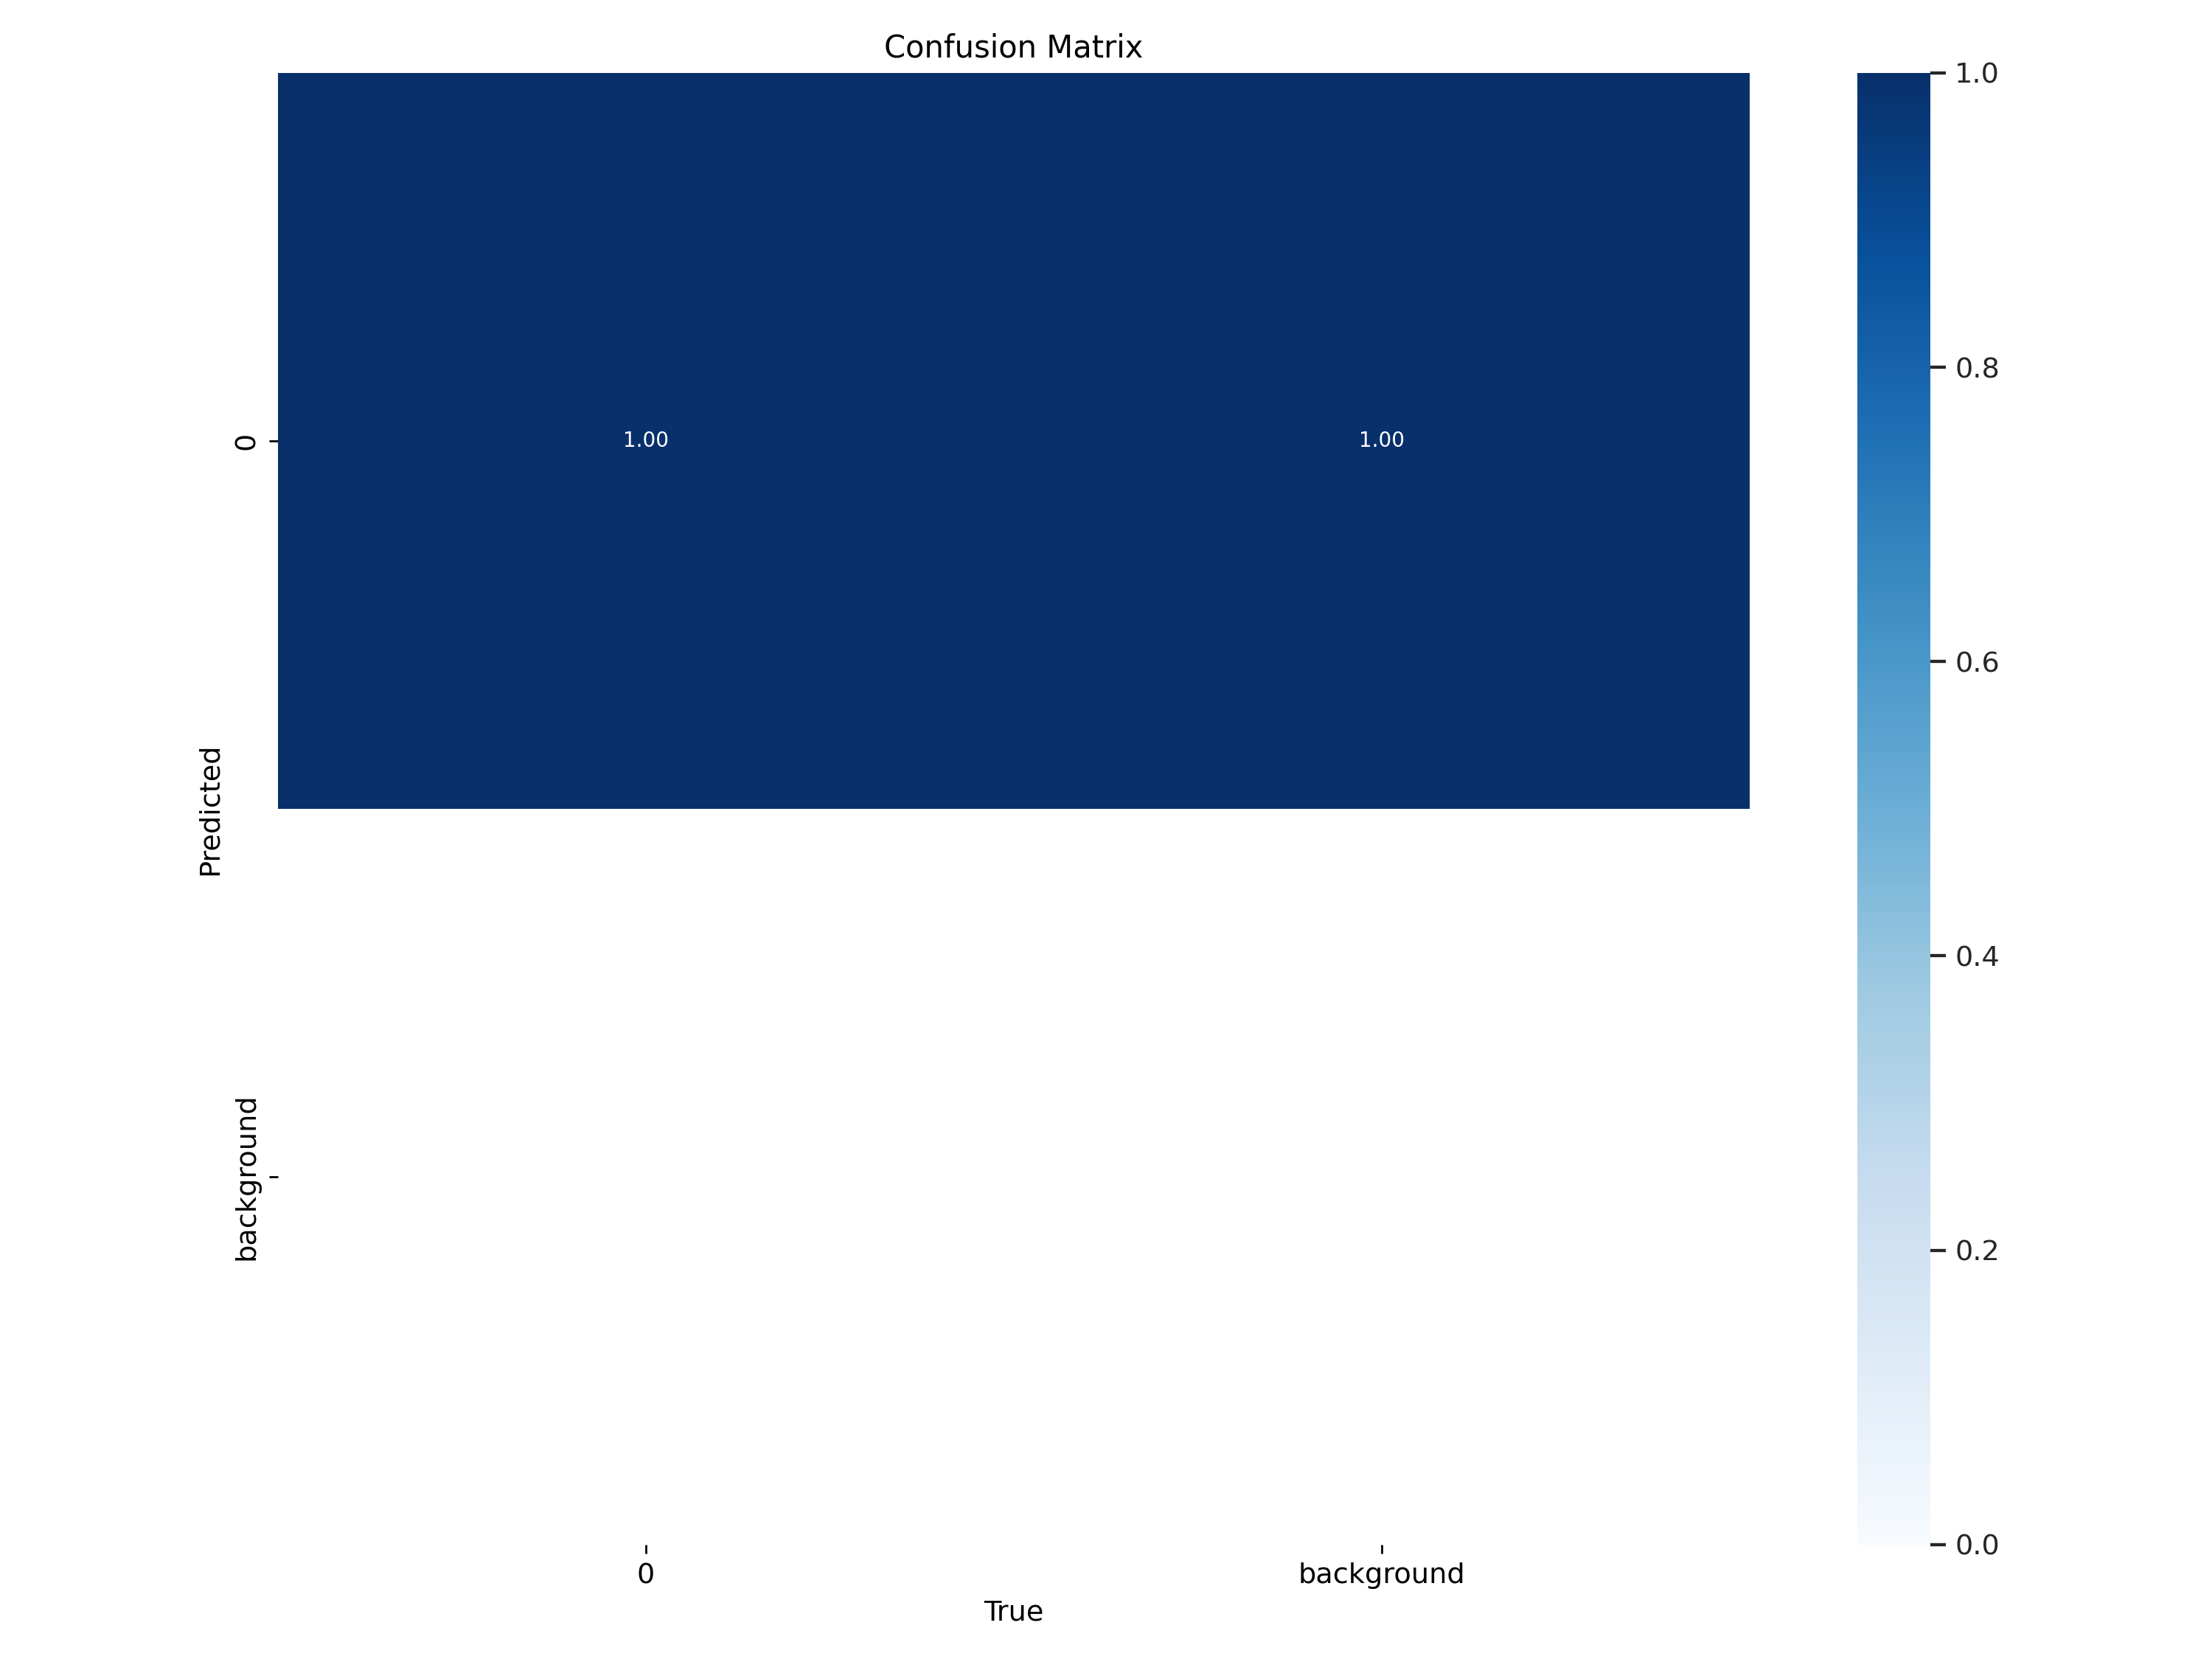

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename='/kaggle/working/yolov5/runs/train/exp/confusion_matrix.png', width=600)

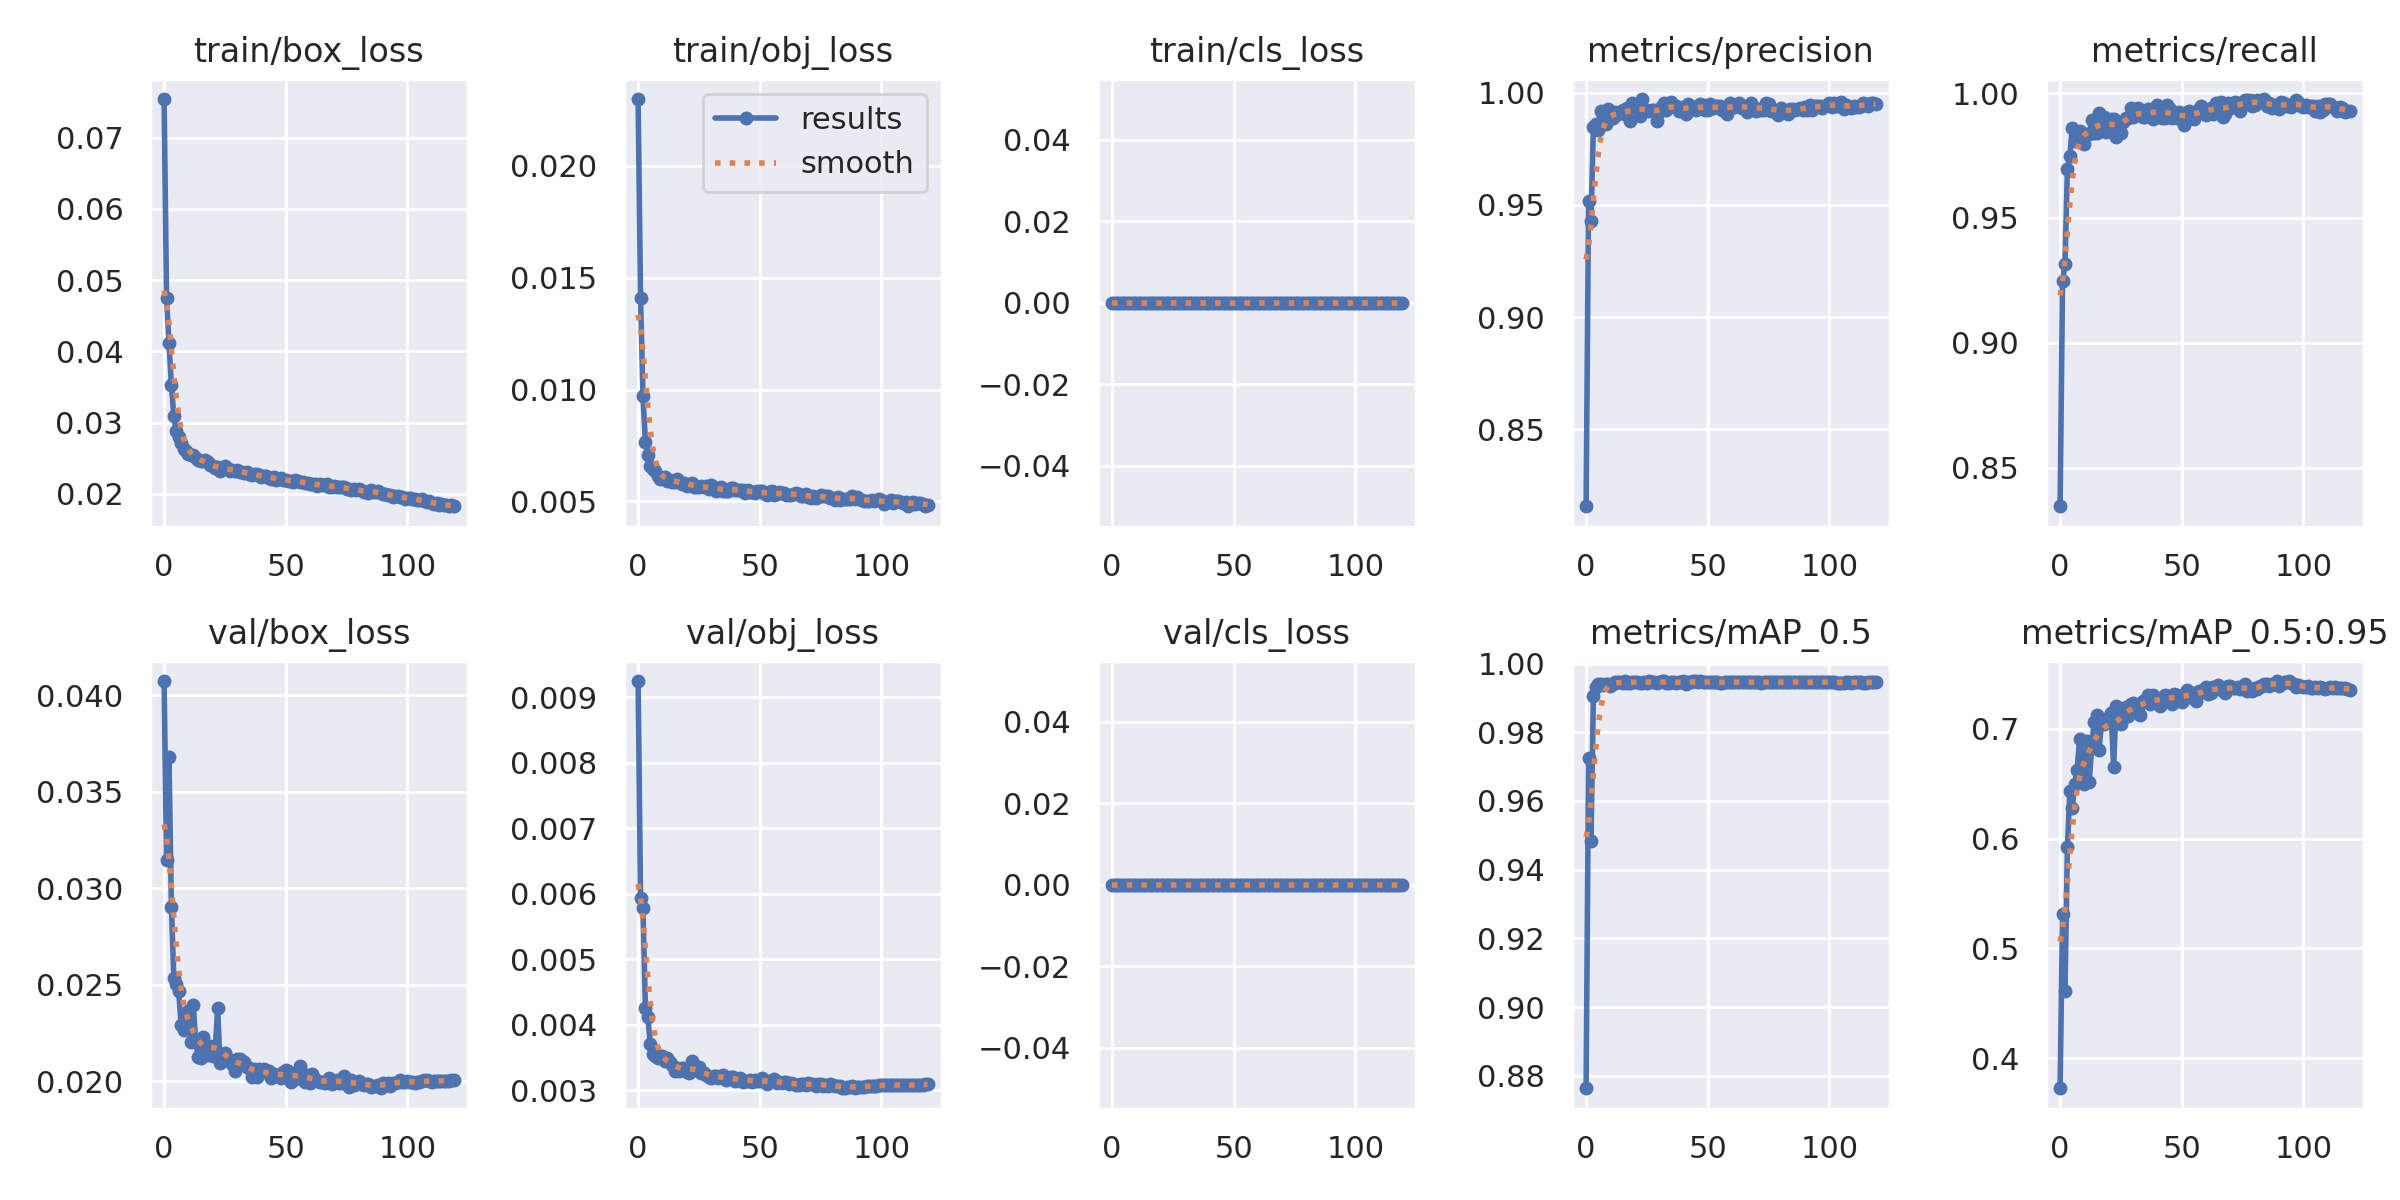

In [11]:
IPyImage(filename='/kaggle/working/yolov5/runs/train/exp/results.png', width=600)

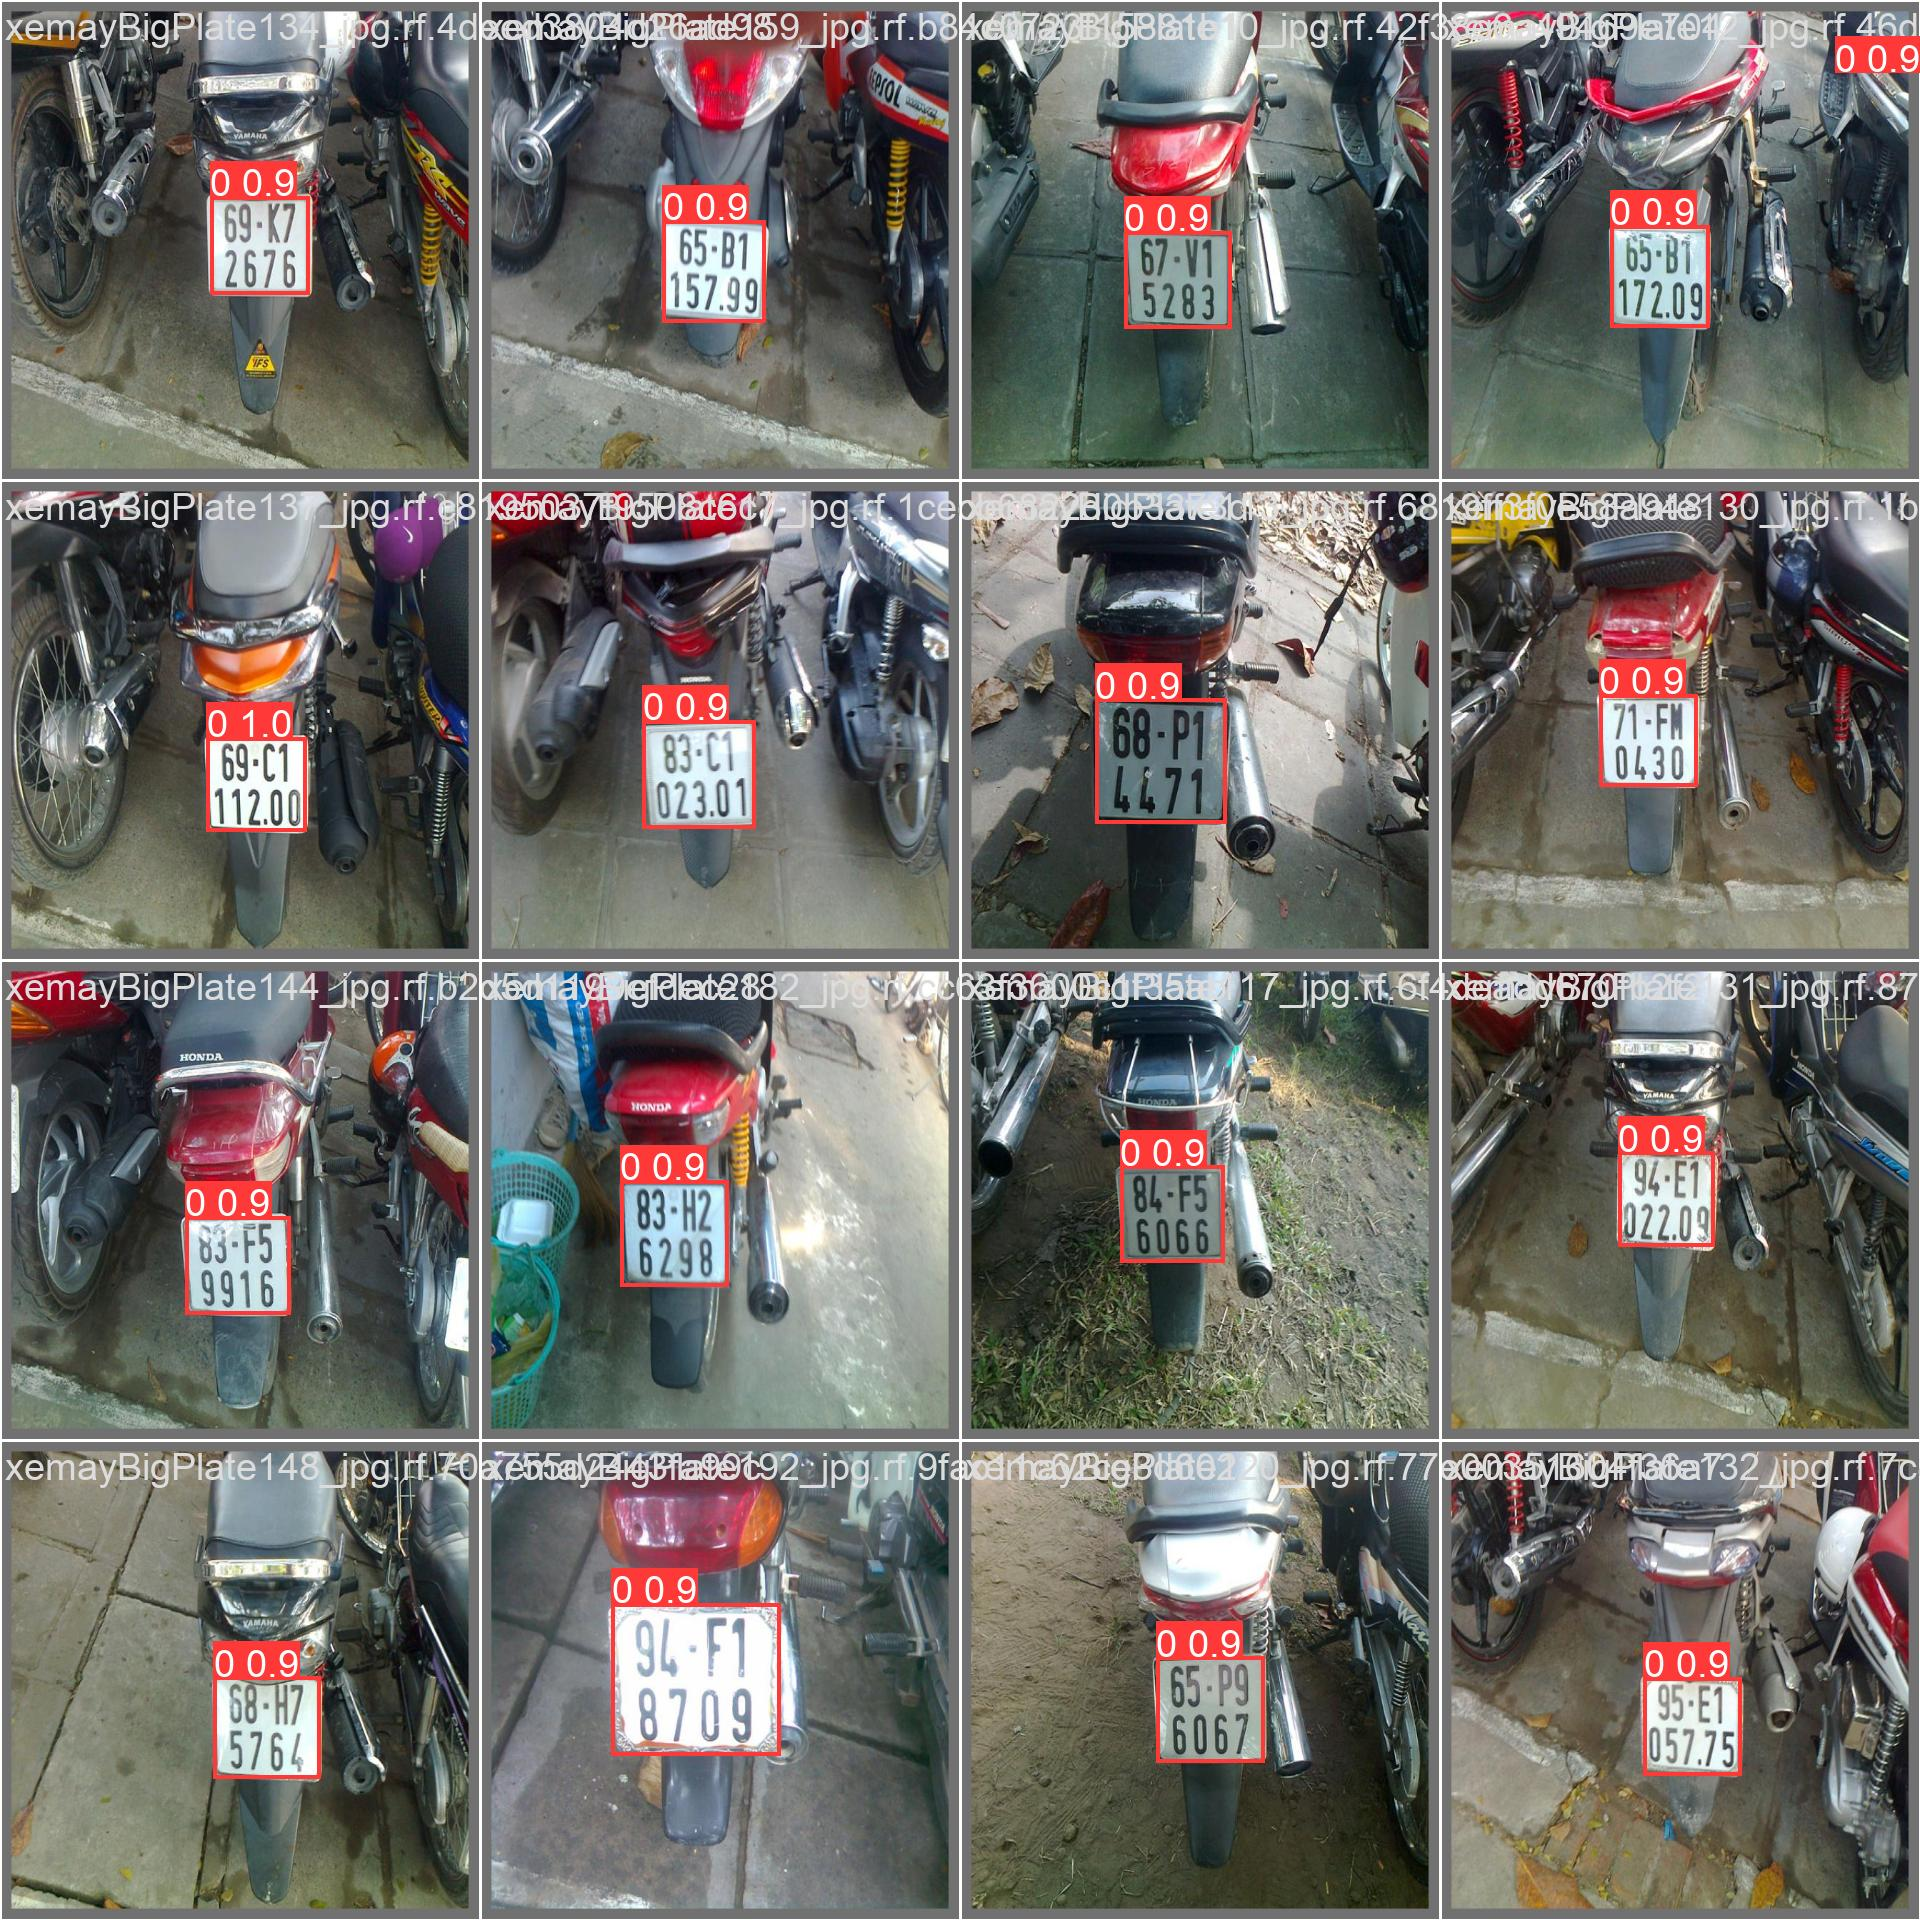

In [12]:
IPyImage(filename='/kaggle/working/yolov5/runs/train/exp/val_batch0_pred.jpg', width=600)

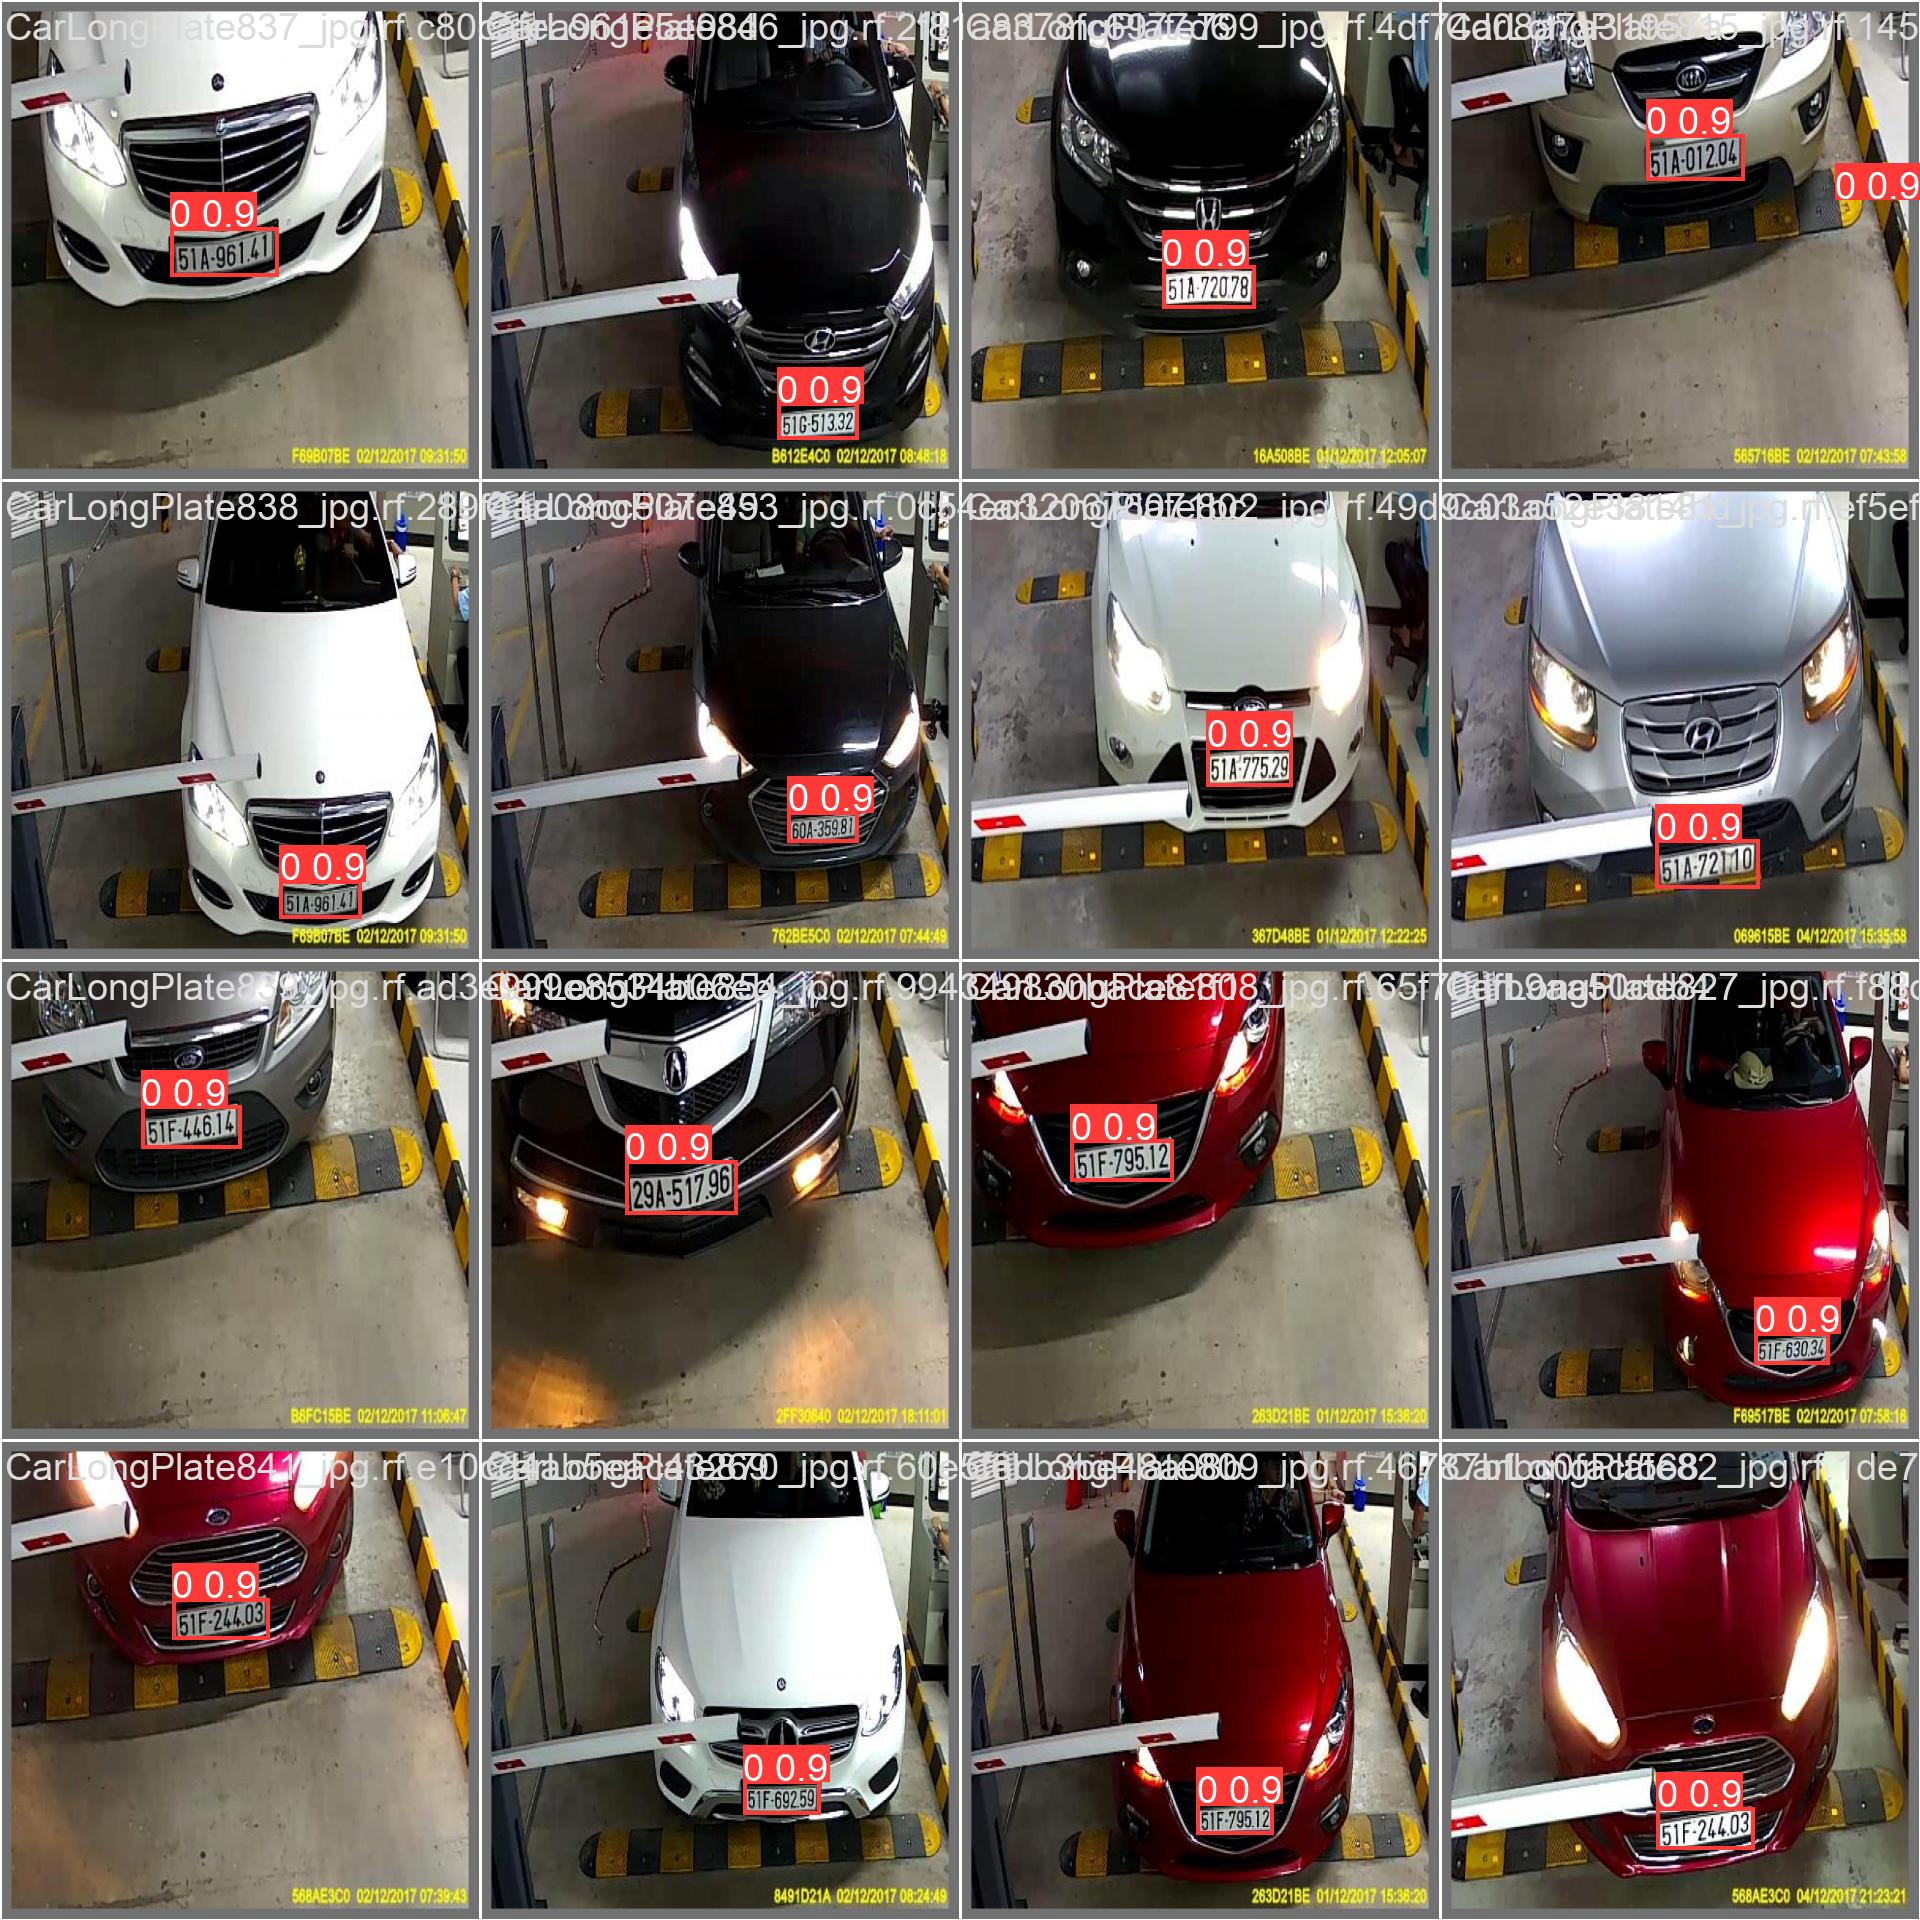

In [13]:
IPyImage(filename='/kaggle/working/yolov5/runs/train/exp/val_batch1_pred.jpg', width=600)

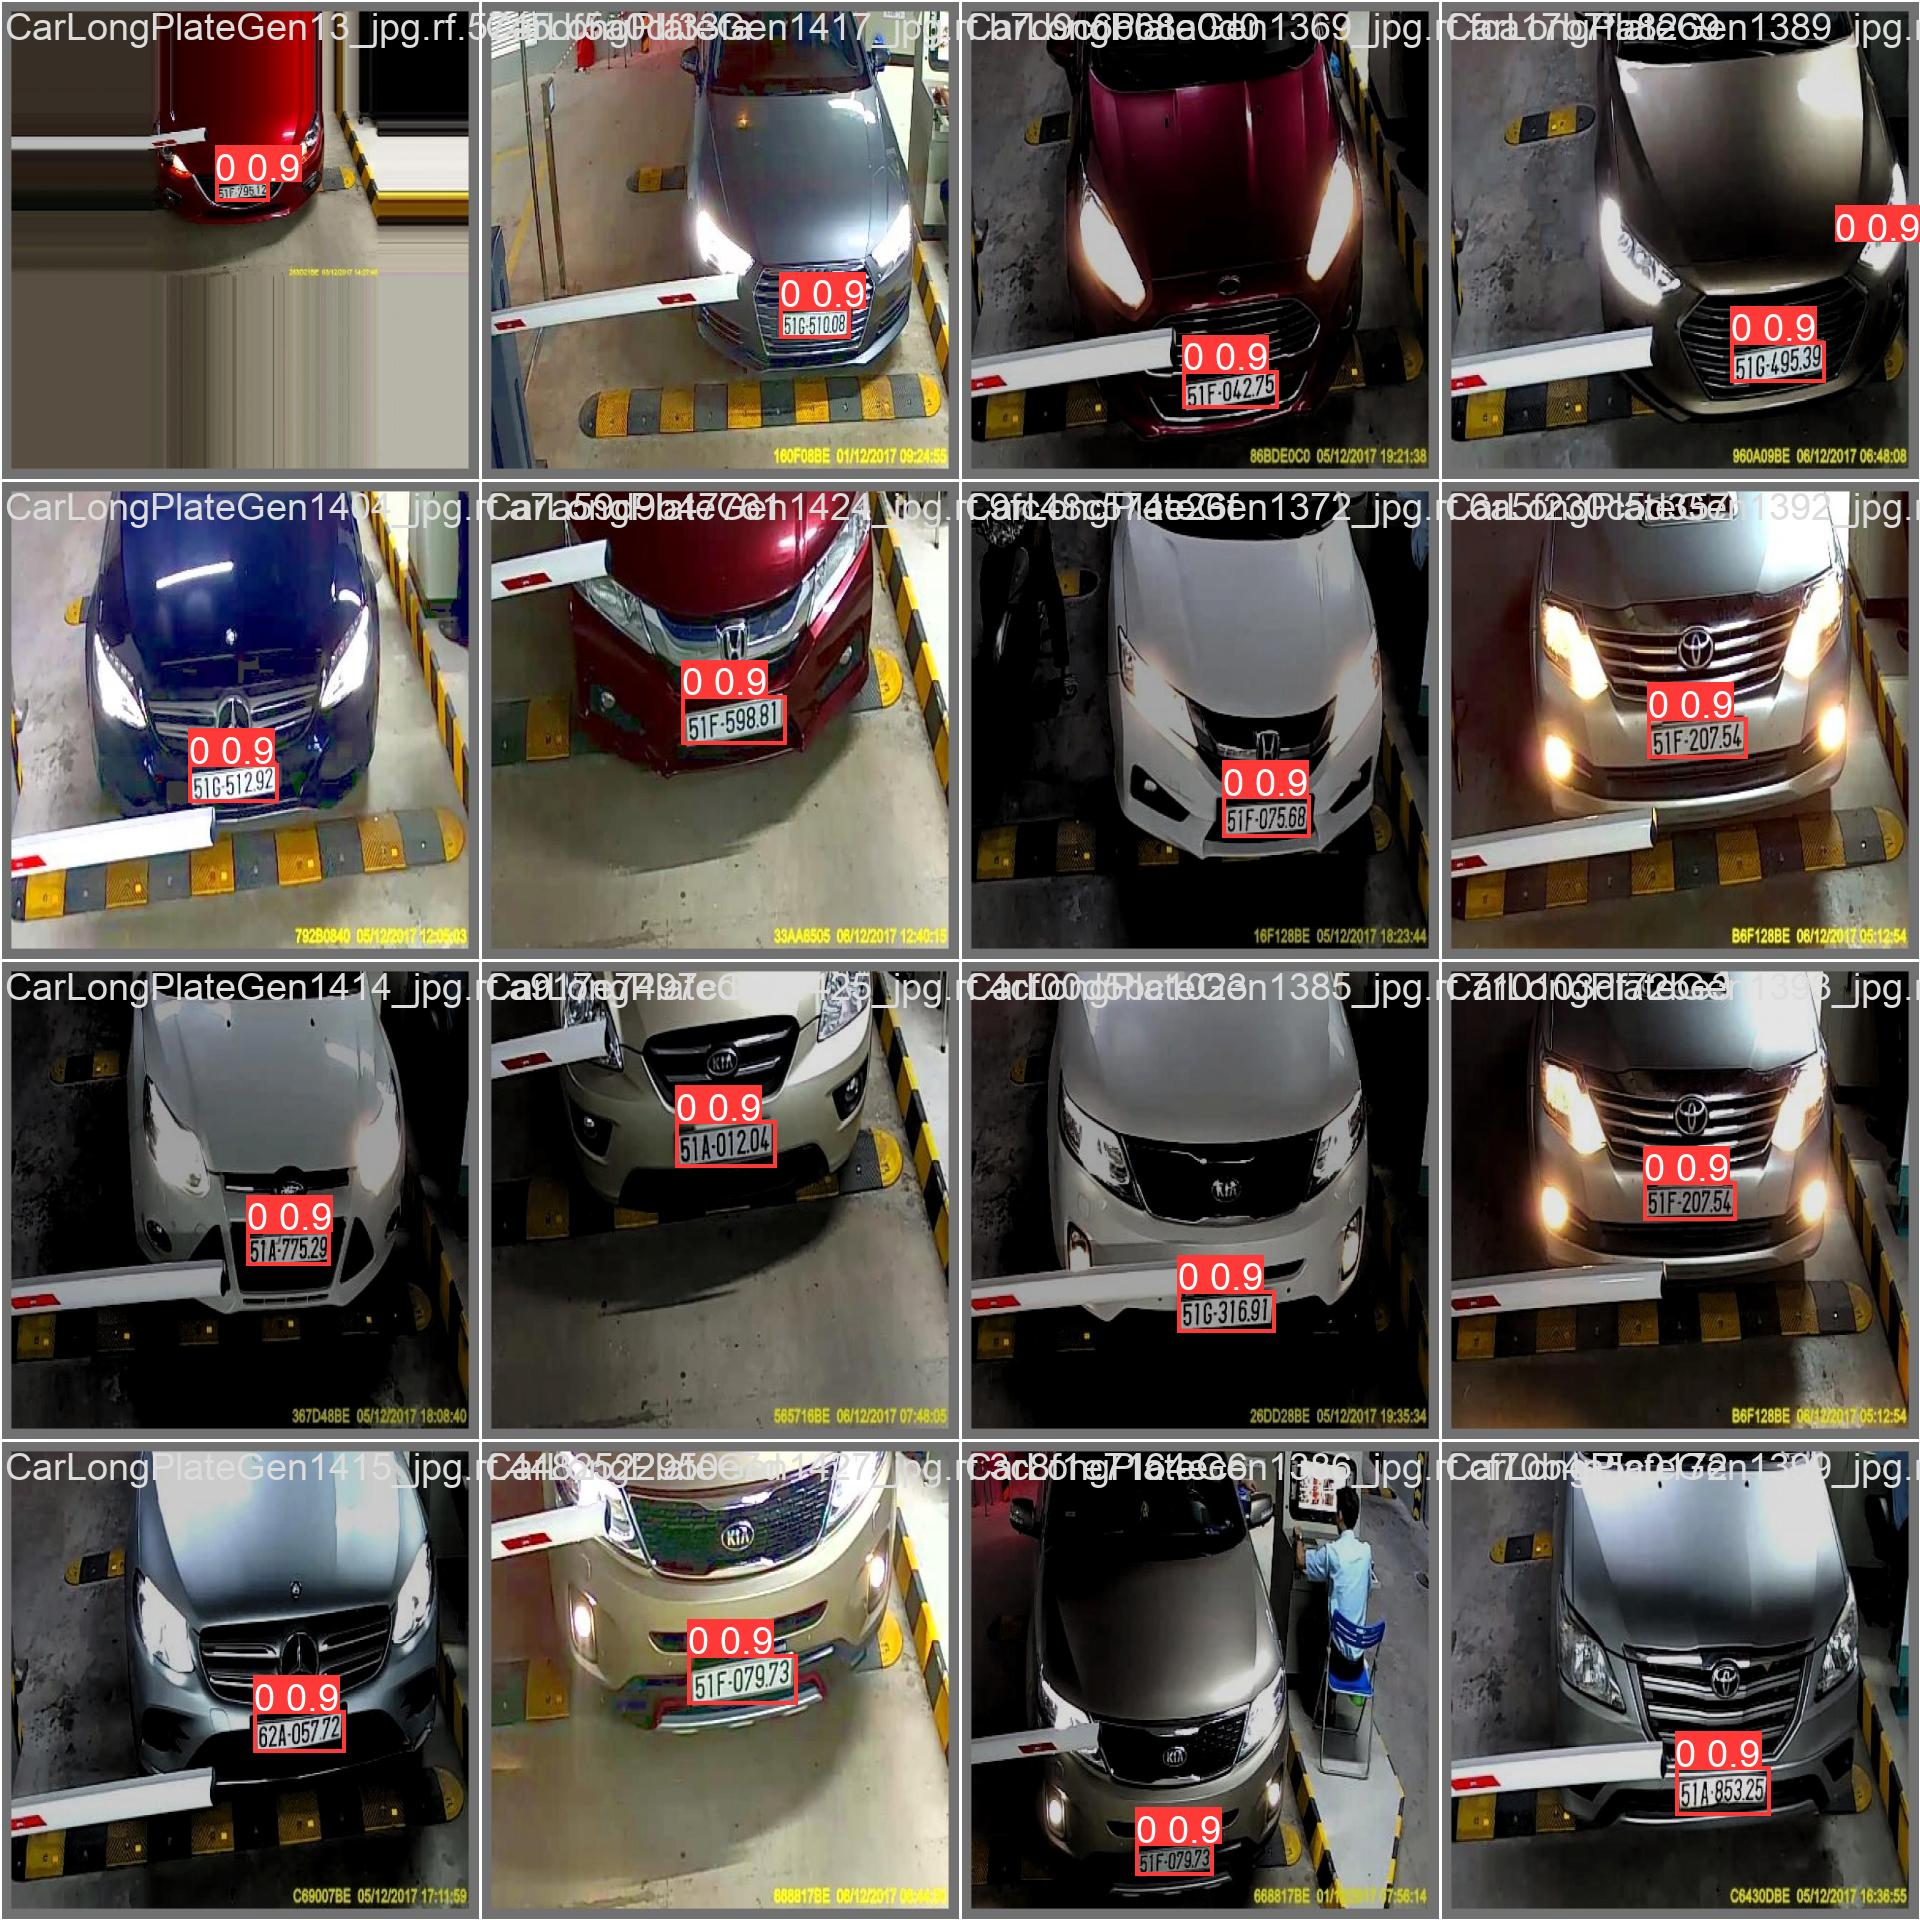

In [14]:
IPyImage(filename='/kaggle/working/yolov5/runs/train/exp/val_batch2_pred.jpg', width=600)